In [1]:
# Libraries Import
import gspread
import pandas as pd
from scipy.io import arff
import urllib.request, json 
from IPython.display import SVG, Markdown, HTML, display
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# XAI Questionnaire Analyser

The following notebook has been created to analyse the results from the XAI questionnaire titled "Survey of the interpretability of decision trees", available at this [Github repository](https://github.com/marcozenere/XAI_Survey). The goal of the questionnaire was to evaluate the interpretability of decision trees.

The notebook is divided into sections, and each of them takes its name from those present in the XAI questionnaire that will analyze this notebook. Each section will explain what information was provided to the survey participants and highlight the results obtained.

## Suggestion on How to Run the Notebook (If run in a notebook environment)

We suggest you to use the "Run all" option of the notebook interpreter instead of running a cell at a time. The option is available in the menu bar in Jupyter environment in Run -> Run All Cells.

---

## Table of Contents

* [Explanation](#explanation)
* [Comprehension Test Results](#comprehensiontestresults)
* [Questions Section Results](#questionssectionresults)
    * [Question 1](#question1)
    * [Question 2](#question2)
    * [Question 3](#question3)
    * [Question 4](#question4)
    * [Question 5](#question5)
* [Explanation 1 VS Explanation2](#explanation1vsexplanation2) 
* [Participants' Demographic Analysis](#participantsanalysis)
    * [Particants Gender](#participantsgender)
    * [Participants Age](#participantsage)
    * [Participants Education Level](#participantseducationlevel)
    * [Participants English Level](#participantsenglishlevel)
    
---

In [2]:
# Dataset Load
data = arff.loadarff("./Dataset/WINE.txt.arff")
dataset = pd.DataFrame(data[0])

In [3]:
# Function to convert the "Class" column of the dataset into more readable values
def labelConversion(label):
    if label == b'1':
        return 'Class 1'
    elif label == b'2':
        return 'Class 2'
    else:
        return 'Class 3'

dataset['Class'] = dataset['Class'].apply(lambda x: labelConversion(x))

In [4]:
# Retrieve of the XAI Questionnaire results
with urllib.request.urlopen("https://xaisurvey.s3.amazonaws.com/survey_bot.json") as url:
    survey_bot = json.loads(url.read().decode())

gc = gspread.service_account_from_dict(survey_bot)
sh = gc.open('SurveyAnswers')
rows = sh.sheet1.get_all_values()
labels = rows.pop(0)
data = pd.DataFrame(data = rows, columns = labels)

## Explanation <a class="anchor" id="explanation"></a>

The XAI questionnaire was presented to the evaluation participants with two representations of the same domain of interest. The two representations were in the form of a decision tree, and they differ in dimension/depth. The decision tree representations were:

### 3-Layers Decision Tree

The following model has a prediction accuracy of 0.927.

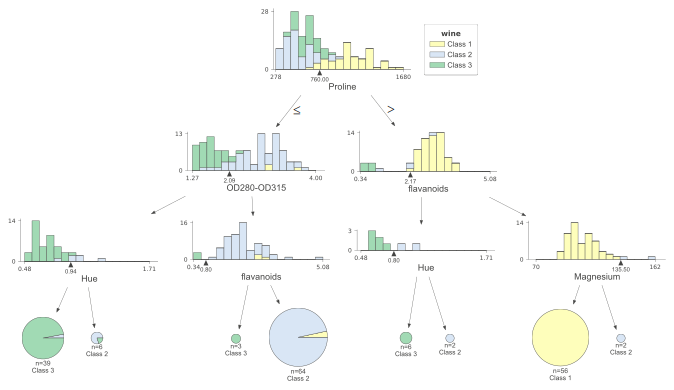

In [5]:
display(SVG(filename='./Images/Decision_Tree_3_layers.svg'))

### 5-Layers Decision Tree

The following model has a prediction accuracy of 0.978.

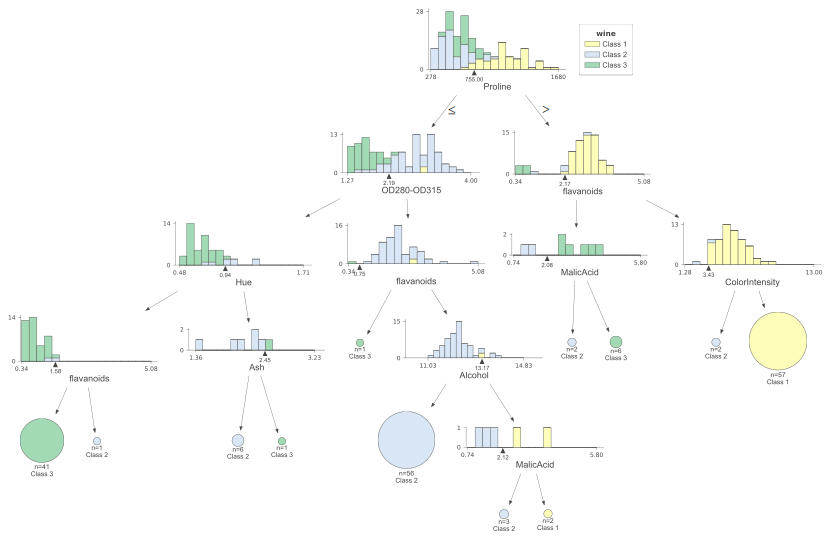

In [6]:
display(SVG(filename='./Images/Decision_Tree_5_layers.svg'))

## Important information regarding the notation

In the following analysis, the 3-layers decision tree will be referred to as "explanation 1", while the 5-layers decision tree will be referred to as "explanation 2".

---

## Comprehension Test Results <a class="anchor" id="comprehensiontestresults"></a>

The comprehension test section aims to test the notions acquired by the participants of the questionnaire and to verify the goodness of the participants' mental model. The test is constructed around the sample with the following features.

In [7]:
# Retrieving the example in row 1 from the dataset
comprehension_test_sample = dataset.iloc[96][:-1].to_frame()
comprehension_test_sample.rename(columns = {comprehension_test_sample.columns[0]:''}, inplace = True)
comprehension_test_sample.transpose()

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
   12.42      2.55  2.27            22.0      90.0         1.68       1.84   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity   Hue OD280-OD315 Proline  
                 0.66            1.42            2.7  0.86         3.3   315.0

The questionnaire participants have to answer two questions based on the visual explanation that represents the model in the form of a decision tree. The visual explanation (3-Layers Decision Tree) provided is presented below.

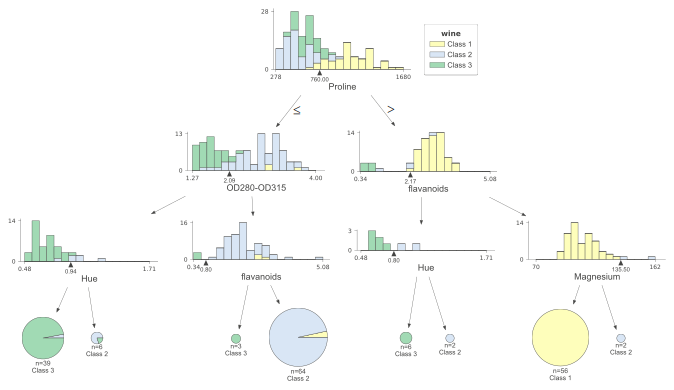

In [8]:
display(SVG(filename='./Images/Decision_Tree_3_layers.svg'))

The two questions posed to the participants of the questionnaire are the following:
* Q1: Which class correspond the wine with the following features? Correct Answer: Class 2
* Q2: Which of the following features/attributes did you consider for the classification? Correct Answer: Proline, OD280/OD315, and Flavanoids

In [9]:
comprehension_test_answers = data['Comprehension-Test Answers'].to_list()
comprehension_test_time_taken = data['Comprehension-Test Time'].to_list()

In [10]:
# Computation of the participants' accuracy in answers given in the Comprehension Test section
comprehension_test_correct_answers_q1 = 0
comprehension_test_wrong_answers_q1 = 0
comprehension_test_correct_answers_q2 = 0
comprehension_test_wrong_answers_q2 = 0

for cell_1, time in zip(comprehension_test_answers, comprehension_test_time_taken):
    user_answers = cell_1.split(', ')
    
    if float(time) > 5.0:
        if user_answers[0] == '2':
            comprehension_test_correct_answers_q1 += 1
        else:
            comprehension_test_wrong_answers_q1 += 1
        if user_answers[1] == '1':
            comprehension_test_correct_answers_q2 += 1
        else:
            comprehension_test_wrong_answers_q2 += 1

In [11]:
q1_accuracy = round(comprehension_test_correct_answers_q1 / (comprehension_test_correct_answers_q1 + comprehension_test_wrong_answers_q1),3)
q2_accuracy = round(comprehension_test_correct_answers_q2 / (comprehension_test_correct_answers_q2 + comprehension_test_wrong_answers_q2),3)

In [12]:
Markdown("""The Comprehension Test section results are:
* The Q1 accuracy is {}
* The Q2 accuracy is {}""".format(q1_accuracy, q2_accuracy))

The Comprehension Test section results are:
* The Q1 accuracy is 0.917
* The Q2 accuracy is 1.0

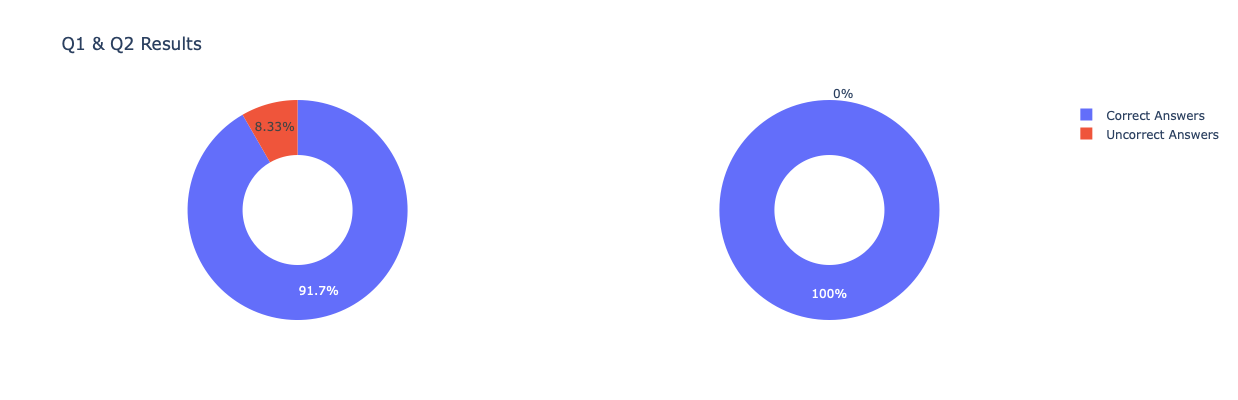

In [13]:
# Pie chart visualization of the Comprehension Test section results
comprehension_test_fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


comprehension_test_fig.add_trace(go.Pie(
     values=[comprehension_test_correct_answers_q1, comprehension_test_wrong_answers_q1],
     labels=["Correct Answers", "Uncorrect Answers"],
     hole=.5,
     name="Q1"), 
     row=1, col=1)

comprehension_test_fig.add_trace(go.Pie(
     values=[comprehension_test_correct_answers_q2,comprehension_test_wrong_answers_q2],
     labels=["Correct Answers", "Uncorrect Answers"],
     hole=.5,
     name="Q2"),
    row=1, col=2)

comprehension_test_fig.update_layout(height=400, width=1000, title_text="Q1 & Q2 Results")

---

## Questions Section Results <a class="anchor" id="questionssectionresults"></a>

The "Questions" section of this XAI questionnaire was structured to test the "Transparency" aspect of the explanation provided to the evaluation participants. To assess the "Transparency" aspect of the provided explanations, this section was structured to satisfy the requirements of performing a 'Forward Simulation" task. In Forward Simulation tasks, participants are provided with an input and an explanation to ask them to predict the system's output. The section was composed of five questions, and in each of them, the participants had to answer only one question composed of three choices (the three classes of the dataset). The questions and the explanation in each of them were presented to the participants randomly.

This section will show the prediction accuracy of the participants and the time taken by the participants to answer the questions by taking into account the explanation they received during the evaluation. 

NB:

If the data for one of the two explanations would miss, the graph associated with it will not be displayed.

In [14]:
# Function for computing the statistics of the 'Questions' section
# The function retrieves all the information for computing the participants' accuracy on answering the questions
def questionStatistics(sample_number, number_of_questions):
    representation_1_occurrences = 0
    representation_1_correct_answers = 0
    representation_2_occurrences = 0
    representation_2_correct_answers = 0
    
    for i in range(1, number_of_questions + 1):
        string_1 = 'Q%s Answer'%i
        string_2 = 'Q%s Time'%i

        for row, time in zip(data[string_1].to_list(), data[string_2].to_list()):
            elements = row.split(', ')

            if float(time) > 5.0 and elements[0] == str(sample_number) and elements[3] == '1':
                if elements[1] == elements[2]:
                    representation_1_correct_answers += 1
                representation_1_occurrences += 1
            elif float(time) > 5.0 and elements[0] == str(sample_number) and elements[3] == '2':
                if elements[1] == elements[2]:
                    representation_2_correct_answers += 1
                representation_2_occurrences += 1
                
    return (representation_1_correct_answers, representation_1_occurrences, representation_2_correct_answers, representation_2_occurrences)

In [15]:
# Function for retrieving the time taken by the participants to answer to the questions
def questionTimeTaken(sample_number, number_of_questions):
    representation_1_time = []
    representation_2_time = []
    
    for i in range(1, number_of_questions + 1):
        string_1 = 'Q%s Answer'%i
        string_2 = 'Q%s Time'%i

        for row, time in zip(data[string_1].to_list(), data[string_2].to_list()):
            elements = row.split(', ')
            
            if elements[0] == str(sample_number) and elements[3] == '1' and float(time) > 5.0:
                representation_1_time.append(float(time))
            elif elements[0] == str(sample_number) and elements[3] == '2' and float(time) > 5.0:
                representation_2_time.append(float(time))
    
    return representation_1_time, representation_2_time

### Question 1  <a class="anchor" id="question1"></a>

The sample used in question 1 is from the row 0 of the dataset and it has the following features:

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
   14.23      1.71  2.43            15.6     127.0          2.8       3.06   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity   Hue OD280-OD315 Proline  
                 0.28            2.29           5.64  1.04        3.92  1065.0

The correct classificiation of the sample was "Class 1". Here the results obtained:
* Prediction Accuracy on Explanation 1: 0.833
* Time Taken to answer the question with Explanation 1: Mean = 24.334, Median = 20.324, Standard Deviation: 9.46
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the question with Explanation 2: Mean = 54.116, Median = 39.63, Standard Deviation: 37.082

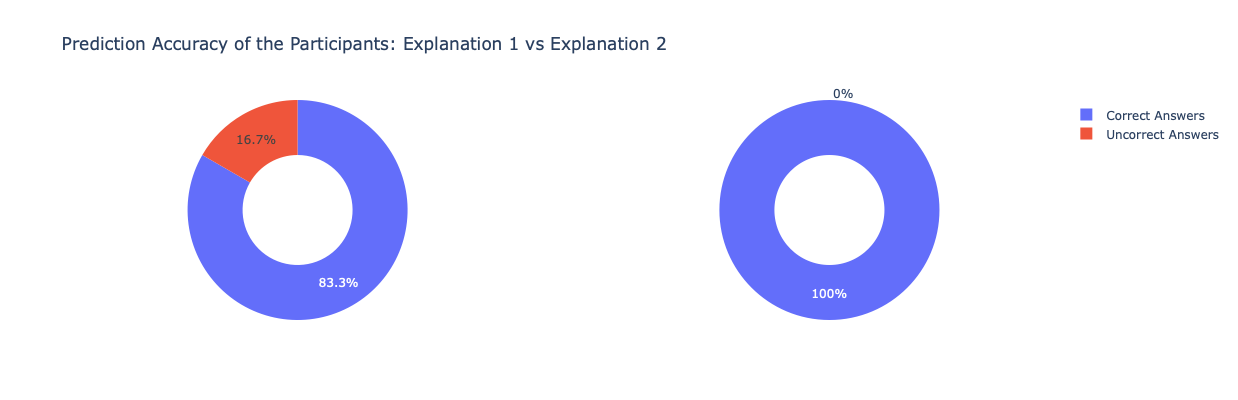

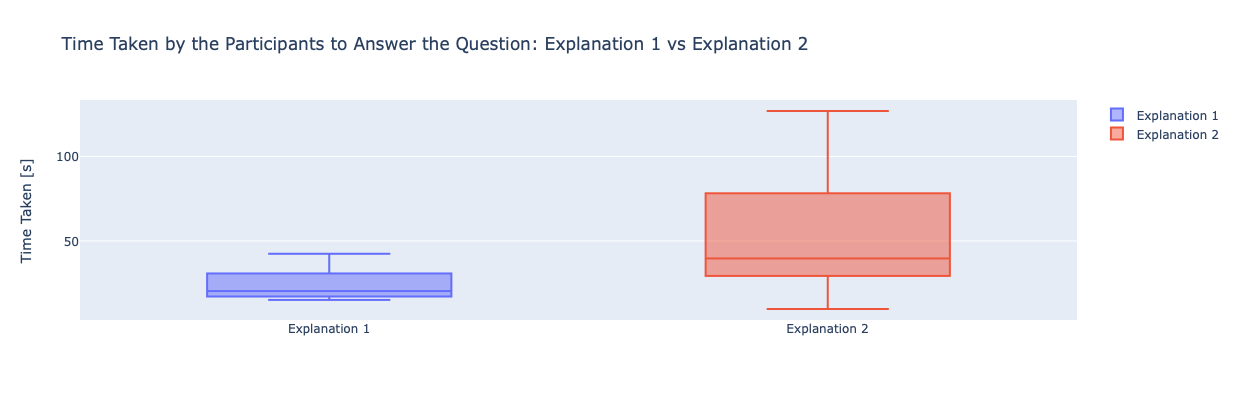

### Question 2  <a class="anchor" id="question2"></a>

The sample used in question 2 is from the row 58 of the dataset and it has the following features:

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
   12.37      1.13  2.16            19.0      87.0          3.5        3.1   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity   Hue OD280-OD315 Proline  
                 0.19            1.87           4.45  1.22        2.87   420.0

The correct classificiation of the sample was "Class 2". Here the results obtained:
* Prediction Accuracy on Explanation 1: 0.875
* Time Taken to answer the question with Explanation 1: Mean = 30.017, Median = 21.45, Standard Deviation: 19.864
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the question with Explanation 2: Mean = 57.928, Median = 29.056, Standard Deviation: 59.66

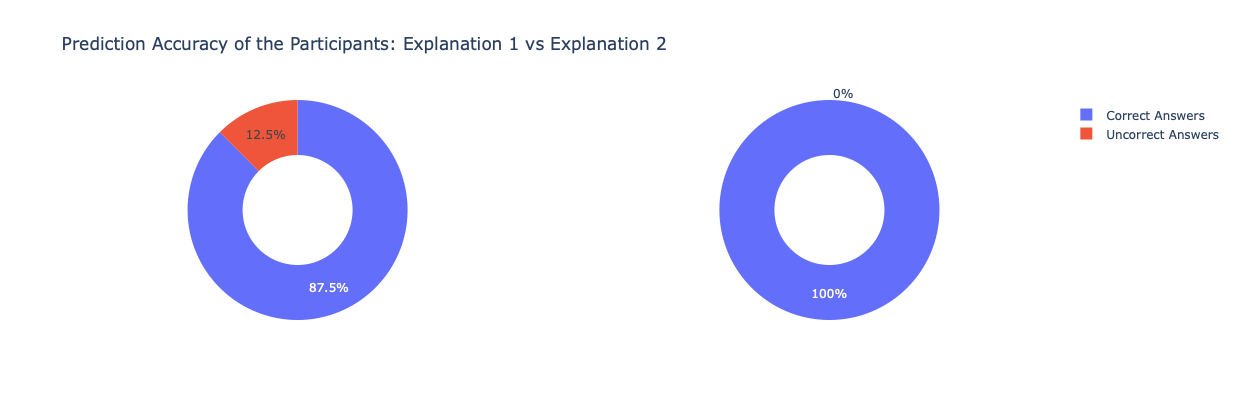

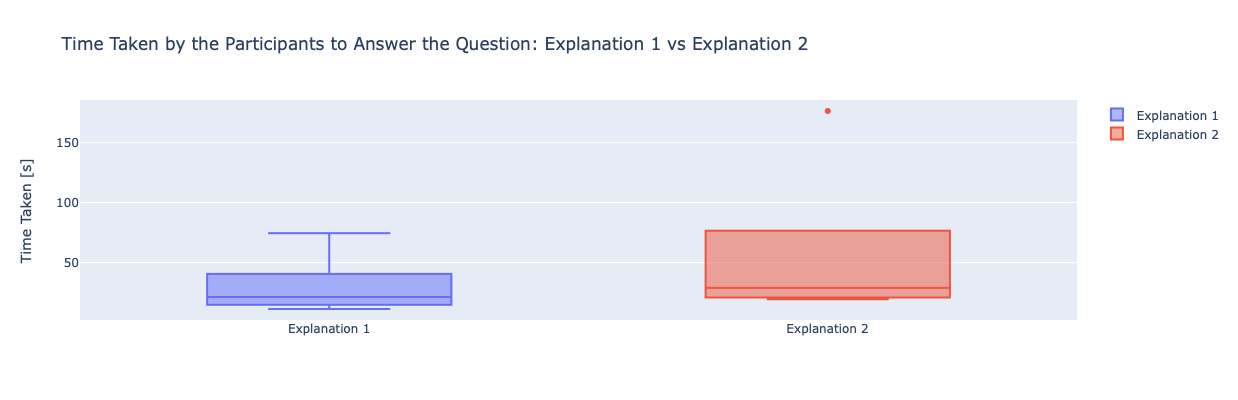

### Question 3  <a class="anchor" id="question3"></a>

The sample used in question 3 is from the row 156 of the dataset and it has the following features:

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
   13.71      5.65  2.45            20.5      95.0         1.68       0.61   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity   Hue OD280-OD315 Proline  
                 0.52            1.06            7.7  0.64        1.74   740.0

The correct classificiation of the sample was "Class 3". Here the results obtained:
* Prediction Accuracy on Explanation 1: 1.0
* Time Taken to answer the question with Explanation 1: Mean = 29.853, Median = 30.653, Standard Deviation: 14.991
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the question with Explanation 2: Mean = 30.027, Median = 31.159, Standard Deviation: 5.945

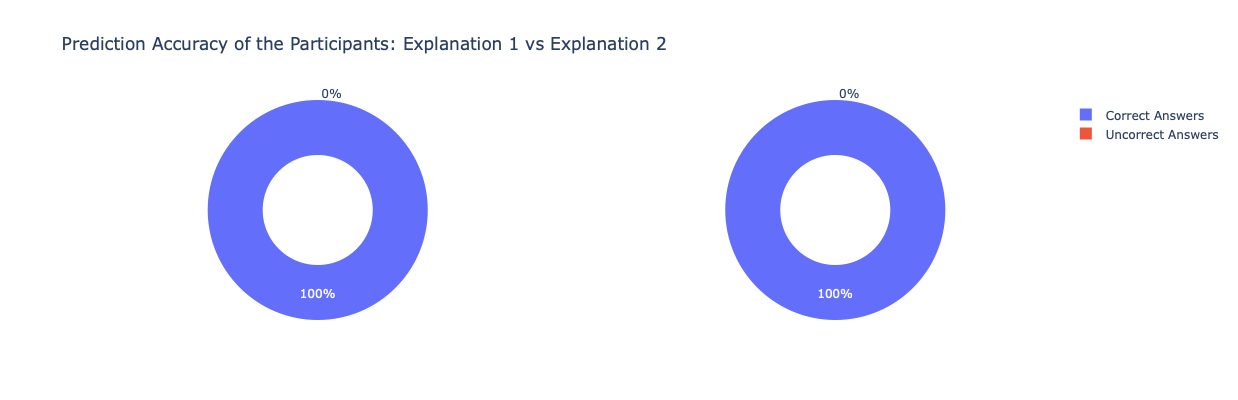

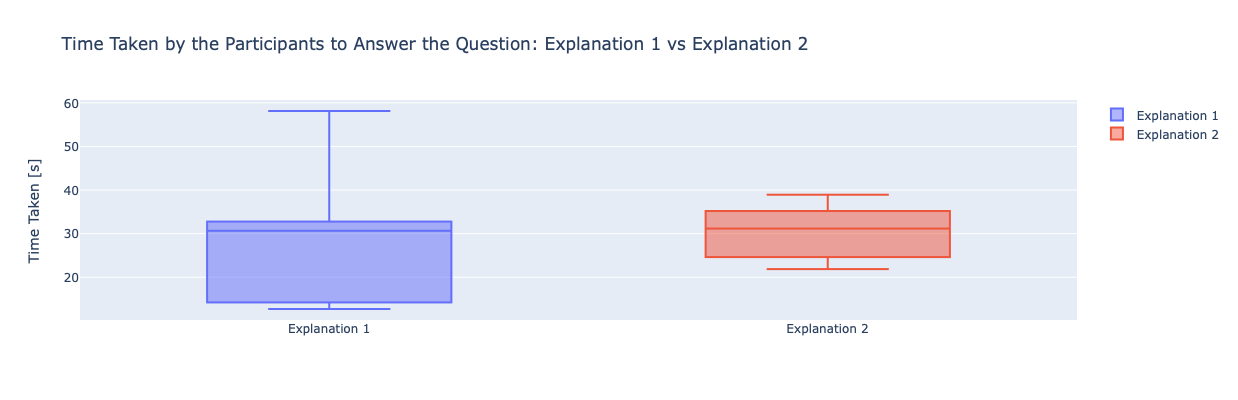

### Question 4  <a class="anchor" id="question4"></a>

The sample used in question 4 is from the row 164 of the dataset and it has the following features:

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
   13.74      1.67  2.25            16.4     118.0          2.6        2.9   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity   Hue OD280-OD315 Proline  
                 0.21            1.62           5.85  0.92         3.2  1060.0

The correct classificiation of the sample was "Class 1". Here the results obtained:
* Prediction Accuracy on Explanation 1: 0.833
* Time Taken to answer the question with Explanation 1: Mean = 39.451, Median = 25.49, Standard Deviation: 26.716
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the question with Explanation 2: Mean = 27.34, Median = 25.816, Standard Deviation: 11.376

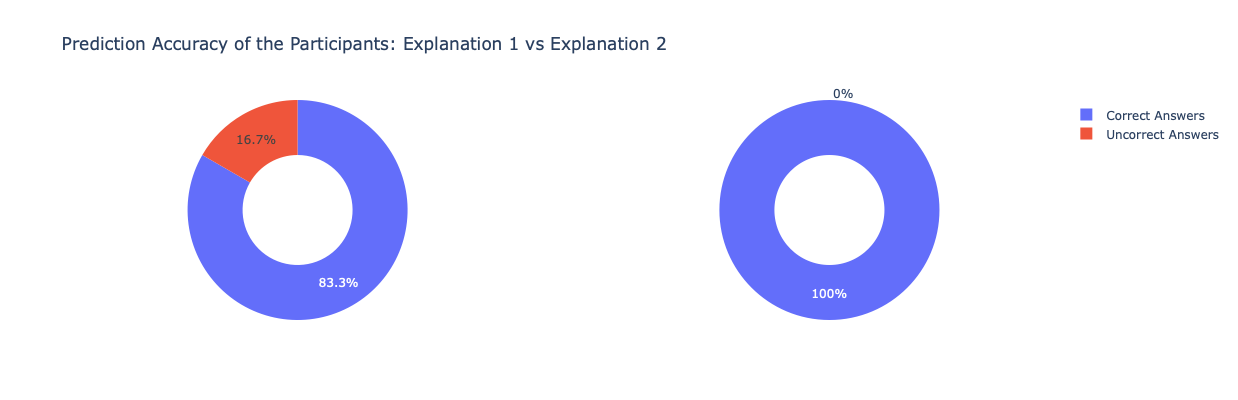

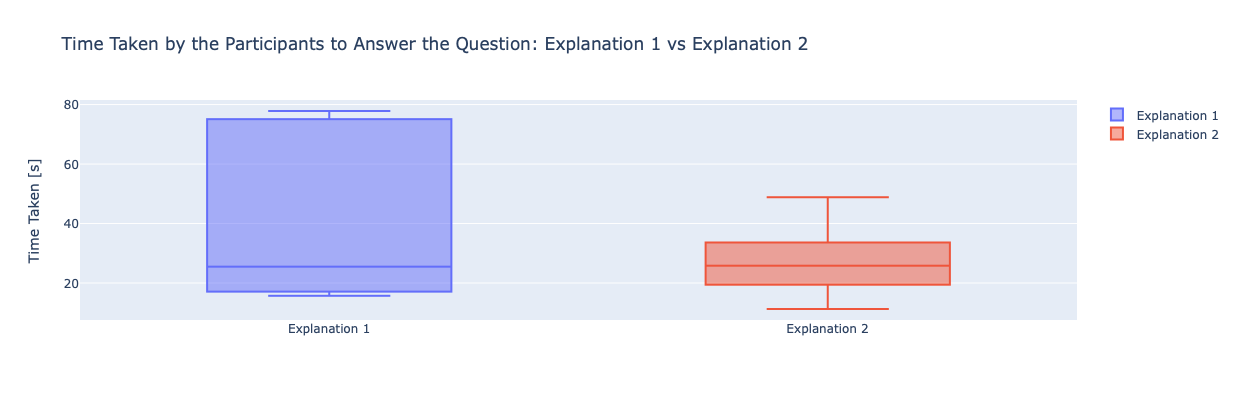

### Question 5  <a class="anchor" id="question5"></a>

The sample used in question 5 is from the row 177 of the dataset and it has the following features:

Alcohol MalicAcid   Ash AlcalinityOfAsh Magnesium TotalPhenols flavanoids  \
    13.4      3.91  2.48            23.0     102.0          1.8       0.75   

 NonflavanoidsPhenols Proanthocyanins ColorIntensity  Hue OD280-OD315 Proline  
                 0.43            1.41            7.3  0.7        1.56   750.0

The correct classificiation of the sample was "Class 3". Here the results obtained:
* Prediction Accuracy on Explanation 1: 0.8
* Time Taken to answer the question with Explanation 1: Mean = 32.567, Median = 19.996, Standard Deviation: 29.821
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the question with Explanation 2: Mean = 29.859, Median = 26.73, Standard Deviation: 11.214

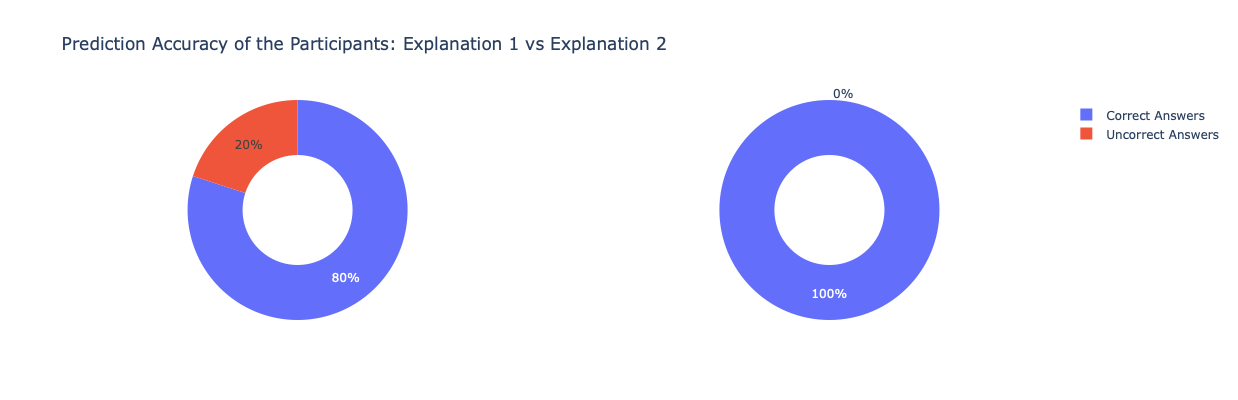

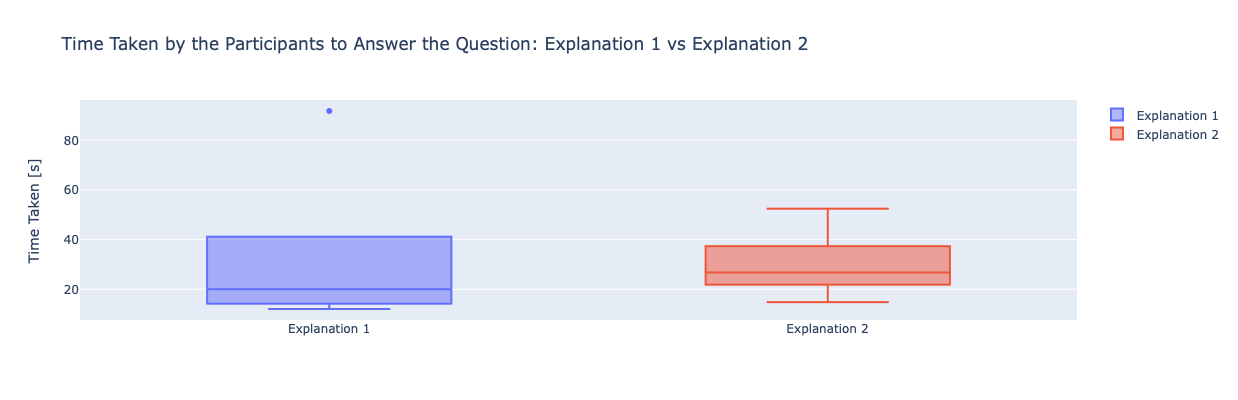

In [16]:
# Question Section Results
for i, sample_number in zip(range(1, 6), [0, 58, 156, 164, 177]):
    display(Markdown("""### Question {}  <a class="anchor" id="question{}"></a>""".format(i,i)))
    display(Markdown("""The sample used in question {} is from the row {} of the dataset and it has the following features:""".format(i, sample_number)))
    
    # Retrieve the selected data from the wine dataset
    sample = dataset.iloc[sample_number][:-1].to_frame()
    sample.rename(columns = {sample.columns[0]:''}, inplace = True)
    correct_class = dataset.iloc[sample_number][-1]
    display(sample.transpose())
    
    # Retrieve the information (statistics and time taken) regarding data considered
    statistics = questionStatistics(sample_number,5)
    time_taken_1, time_taken_2 = questionTimeTaken(sample_number,5)
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
    
    accuracy_1 = 0.0
    accuracy_2 = 0.0
    
    if statistics [0] > 0:
        accuracy_1 = round((statistics [0] / statistics[1]),3)
    
    if statistics [2] > 0:
        accuracy_2 = round((statistics [2] / statistics[3]),3)
    
    tt1_mean = 0.0
    tt1_median = 0.0
    tt1_standard_deviation = 0.0
    tt2_mean = 0.0
    tt2_median = 0.0
    tt2_standard_deviation = 0.0
    
    if len(time_taken_1) > 0:
        tt1_mean = round(np.mean(time_taken_1),3)
        tt1_median = round(np.median(time_taken_1),3)
        tt1_standard_deviation = round(np.std(time_taken_1),3)
        
    if len(time_taken_2) > 0:
        tt2_mean = round(np.mean(time_taken_2),3)
        tt2_median = round(np.median(time_taken_2),3)
        tt2_standard_deviation = round(np.std(time_taken_2),3)
    
    display(Markdown('''The correct classificiation of the sample was "{}". Here the results obtained:
* Prediction Accuracy on Explanation 1: {}
* Time Taken to answer the question with Explanation 1: Mean = {}, Median = {}, Standard Deviation: {}
* Prediction Accuracy on Explanation 2: {}
* Time Taken to answer the question with Explanation 2: Mean = {}, Median = {}, Standard Deviation: {}'''.format(correct_class, accuracy_1, tt1_mean, tt1_median, tt1_standard_deviation, accuracy_2, tt2_mean, tt2_median, tt2_standard_deviation)))

    # Plots of the results
    
    # Accuracy Plots
    fig.add_trace(go.Pie(
         values=[statistics[0],statistics[1] - statistics[0]],
         labels=["Correct Answers", "Uncorrect Answers"],
         hole=.5,
         domain=dict(x=[0, 0.5]),
         name="Explanation 1"), 
         row=1, col=1)

    fig.add_trace(go.Pie(
         values=[statistics[2],statistics[3] - statistics[2]],
         labels=["Correct Answers", "Uncorrect Answers"],
         hole=.5,
         domain=dict(x=[0.5, 1.0]),
         name="Explanation 2"),
        row=1, col=2)

    fig.update_layout(height=400, width=1000, title_text="Prediction Accuracy of the Participants: Explanation 1 vs Explanation 2")
    display(fig)
    
    # Plot of the time taken to answer the question
    box_plot = go.Figure()
    box_plot.add_trace(go.Box(y= time_taken_1, name = 'Explanation 1'))
    box_plot.add_trace(go.Box(y= time_taken_2, name = 'Explanation 2'))

    box_plot.update_layout(
        height=400, 
        width=1000,
        yaxis_title='Time Taken [s]',
        title_text="Time Taken by the Participants to Answer the Question: Explanation 1 vs Explanation 2"
    )

    display(box_plot)

---

## Explanation 1 VS Explanation 2 <a class="anchor" id="explanation1vsexplanation2"></a>

In this section, the notebook will highlight the users' prediction accuracy and the time taken to answer the questions considering all the questions with explanations 1 and 2.

In [17]:
representations_statistics = [0, 0, 0, 0]
representations_time = [[],[]]
#representation_2_time = []
for sample_number in [0, 58, 156, 164, 177]:
    # Retrieve the information (statistics and time taken) regarding data considered
    statistics = questionStatistics(sample_number,5)
    representations_statistics[0] += statistics[0]
    representations_statistics[1] += statistics[1]
    representations_statistics[2] += statistics[2]
    representations_statistics[3] += statistics[3]
    time_taken_1, time_taken_2 = questionTimeTaken(sample_number,5)
    for time_1, time_2 in zip(time_taken_1, time_taken_2):
        representations_time[0].append(time_1)
        representations_time[1].append(time_2)


* Prediction Accuracy on Explanation 1: 0.871
* Time Taken to answer the questions with Explanation 1: Mean = 30, Median = 20.324, Standard Deviation: 20.797
* Prediction Accuracy on Explanation 2: 1.0
* Time Taken to answer the questions with Explanation 2: Mean = 41.164, Median = 30.876, Standard Deviation: 34.599

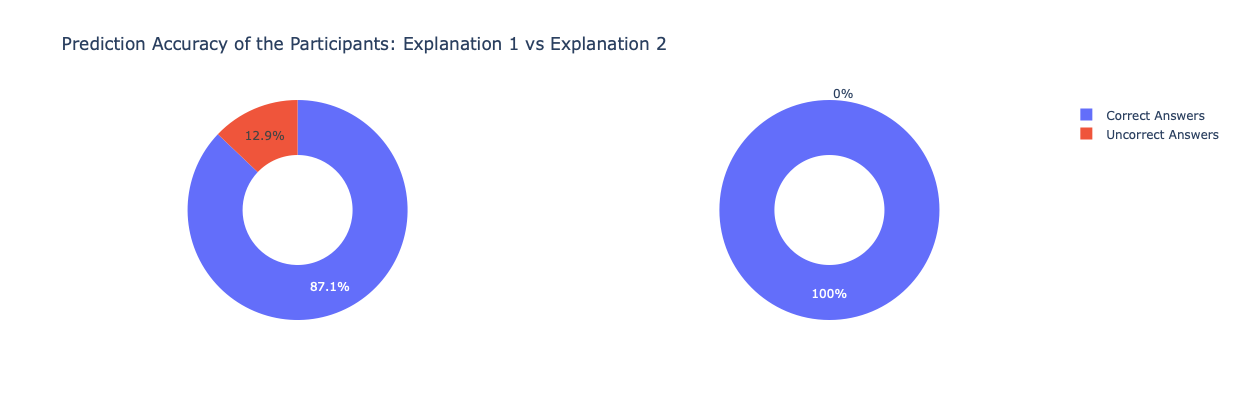

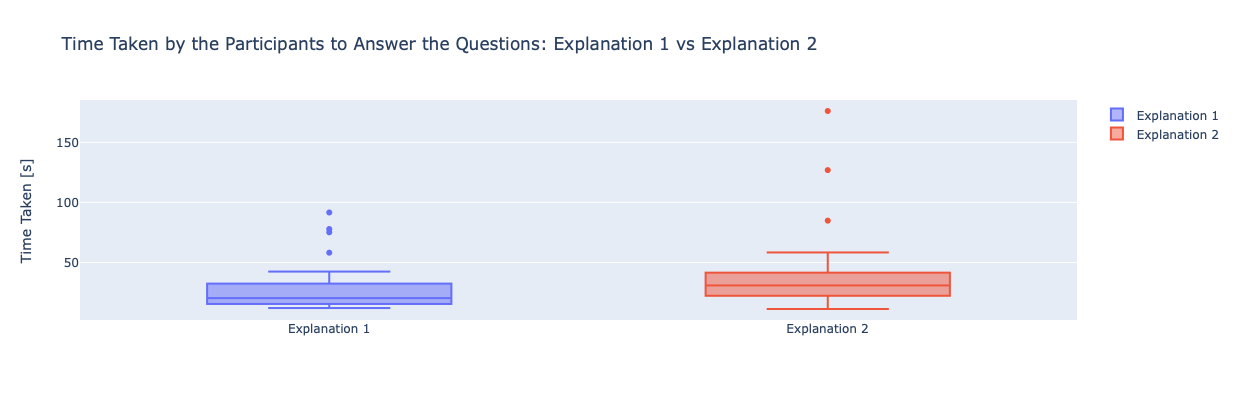

In [18]:
fig_explanations_comparison = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

    
accuracy_1 = 0.0
accuracy_2 = 0.0
    
if representations_statistics[0] > 0:
    accuracy_1 = round((representations_statistics[0] / representations_statistics[1]),3)
    
if representations_statistics[2] > 0:
    accuracy_2 = round((representations_statistics[2] / representations_statistics[3]),3)
    
tt1_mean = 0.0
tt1_median = 0.0
tt1_standard_deviation = 0.0
tt2_mean = 0.0
tt2_median = 0.0
tt2_standard_deviation = 0.0
    
if len(representations_time[0]) > 0:
    tt1_mean = round(np.mean(representations_time[0]))
    tt1_median = round(np.median(representations_time[0]),3)
    tt1_standard_deviation = round(np.std(representations_time[0]),3)
        
if len(representations_time[1]) > 0:
    tt2_mean = np.round(np.mean(representations_time[1]),3)
    tt2_median = np.round(np.median(representations_time[1]),3)
    tt2_standard_deviation = np.round(np.std(representations_time[1]),3)
    
display(Markdown("""
* Prediction Accuracy on Explanation 1: {}
* Time Taken to answer the questions with Explanation 1: Mean = {}, Median = {}, Standard Deviation: {}
* Prediction Accuracy on Explanation 2: {}
* Time Taken to answer the questions with Explanation 2: Mean = {}, Median = {}, Standard Deviation: {}""".format(accuracy_1, tt1_mean, tt1_median, tt1_standard_deviation, accuracy_2, tt2_mean, tt2_median, tt2_standard_deviation)))

# Plots of the results
    
# Accuracy Plots
fig_explanations_comparison.add_trace(go.Pie(
        values=[representations_statistics[0],representations_statistics[1] - representations_statistics[0]],
        labels=["Correct Answers", "Uncorrect Answers"],
        hole=.5,
        domain=dict(x=[0, 0.5]),
        name="Explanation 1"), 
        row=1, col=1)

fig_explanations_comparison.add_trace(go.Pie(
        values=[representations_statistics[2],representations_statistics[3] - representations_statistics[2]],
        labels=["Correct Answers", "Uncorrect Answers"],
        hole=.5,
        domain=dict(x=[0.5, 1.0]),
        name="Explanation 2"),
        row=1, col=2)

fig_explanations_comparison.update_layout(height=400, width=1000, title_text="Prediction Accuracy of the Participants: Explanation 1 vs Explanation 2")

display(fig_explanations_comparison)

# Plot of the time taken to answer the questions
box_plot_explanations_comparison = go.Figure()
box_plot_explanations_comparison.add_trace(go.Box(y= representations_time[0], name = 'Explanation 1'))
box_plot_explanations_comparison.add_trace(go.Box(y= representations_time[1], name = 'Explanation 2'))

box_plot_explanations_comparison.update_layout(
    height=400, 
    width=1000,
    yaxis_title='Time Taken [s]',
    title_text="Time Taken by the Participants to Answer the Questions: Explanation 1 vs Explanation 2"
)
display(box_plot_explanations_comparison)

---

## Participants' Demographic Analysis <a class="anchor" id="participantsanalysis"></a>

In [19]:
Markdown("""The questionnaire was completed by {} participants. Below you will find some information about them.""".format(data.shape[0]))

The questionnaire was completed by 13 participants. Below you will find some information about them.

In [20]:
# Labels
participant_Gender = ['Male','Female','Other','Prefer not to say']
participant_Age = ['18-20', '21-29', '30-39', '40-49', '50-59', '60 or older']
participant_Education_Level = ['Less than high school degree', 'High school degree or equivalent', 'Undergraduate', 'Graduate']
participant_English_Level = ['Beginner (A1)', 'Elementary (A2)', 'Lower Intermidiate (B1)', 'Upper Intermidiate (B2)', 'Advanced (C1)', 'Proficient (C2)']

In [21]:
participant_gender_values = []
for i,label in zip(range(1, len(participant_Gender) + 1),participant_Gender.copy()):
    counter = int(data[['Participant Gender']].eq(str(i)).sum().values)
    if counter != 0:
        participant_gender_values.append(counter)
    else:
        participant_Gender.remove(label)

participant_age_values = []
for i,label in zip(range(1, len(participant_Age) + 1), participant_Age.copy()):
    counter = int(data[['Participant Age']].eq(str(i)).sum().values)
    if counter != 0:
        participant_age_values.append(counter)
    else:
        participant_Age.remove(label)

participant_education_values = []
for i,label in zip(range(1, len(participant_Education_Level) + 1), participant_Education_Level.copy()):
    counter = int(data[['Participant Education']].eq(str(i)).sum().values)
    if counter != 0:
        participant_education_values.append(counter)
    else:
        participant_Education_Level.remove(label)
        
participant_english_level_values = []
for i,label in zip(range(1, len(participant_English_Level) + 1), participant_English_Level.copy()):
    counter = int(data[['Participant English Level']].eq(str(i)).sum().values)
    if counter != 0:
        participant_english_level_values.append(counter)
    else:
        participant_English_Level.remove(label)

### Participants Gender <a class="anchor" id="participantsgender"></a>

Participants of the evaluation could select one of the following choices:

* Male
* Female
* Other
* Prefer not to say

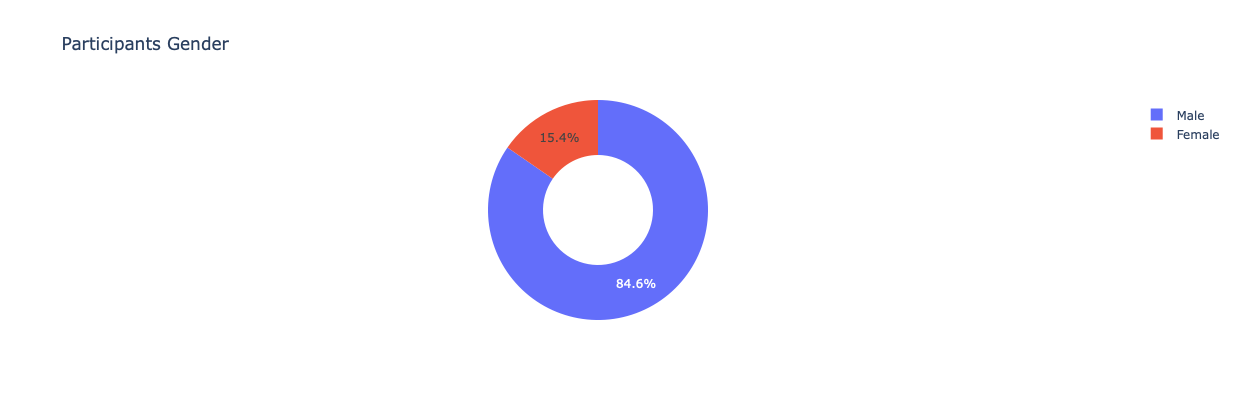

In [22]:
pie_1 = go.Figure(data=[go.Pie(
    name ='Participant Gender',
    labels = participant_Gender,
    values = participant_gender_values,
     hole=.5
)])

pie_1.update_layout(
    height=400, 
    width=1000,
    title_text="Participants Gender"
)

### Participants Age <a class="anchor" id="participantsage"></a>

Participants of the evaluation could select one of the following choices:
    
* 18-20
* 21-29
* 30-39
* 40-49
* 50-59
* 60 or older

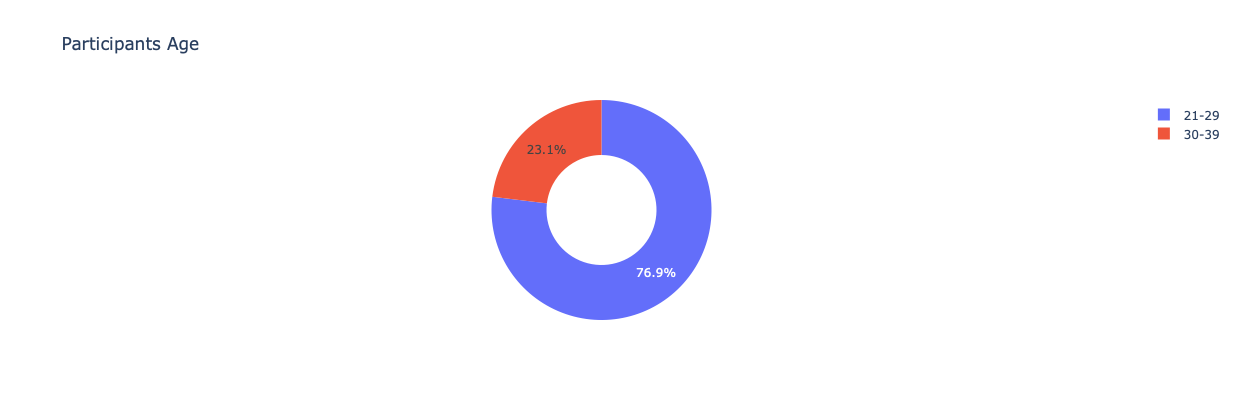

In [23]:
pie_2 = go.Figure(data=[go.Pie(
    name ='Participant Age',
    labels = participant_Age,
    values = participant_age_values,
     hole=.5
)])

pie_2.update_layout(
    height=400, 
    width=1000,
    title_text="Participants Age"
)

### Participants Education Level <a class="anchor" id="participantseducationlevel"></a>

Participants of the evaluation could select one of the following choices:
    
* Less than high school degree
* High school degree or equivalent
* Undergraduate
* Graduate

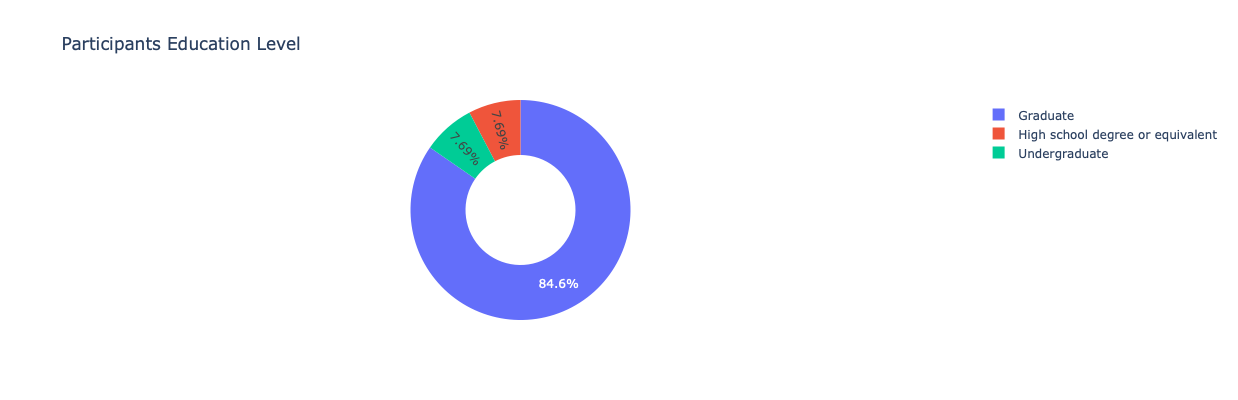

In [24]:
pie_3 = go.Figure(data=[go.Pie(
    name ='Participant Education Level',
    labels = participant_Education_Level,
    values = participant_education_values,
     hole=.5
)])

pie_3.update_layout(
    height=400, 
    width=1000,
    title_text="Participants Education Level"
)

### Participants English Level <a class="anchor" id="participantsenglishlevel"></a>

Participants of the evaluation could select one of the following choices:
    
* Beginner (A1)
* Elementary (A2)
* Lower Intermidiate (B1)
* Upper Intermidiate (B2)
* Advanced (C1)
* Proficient (C2)

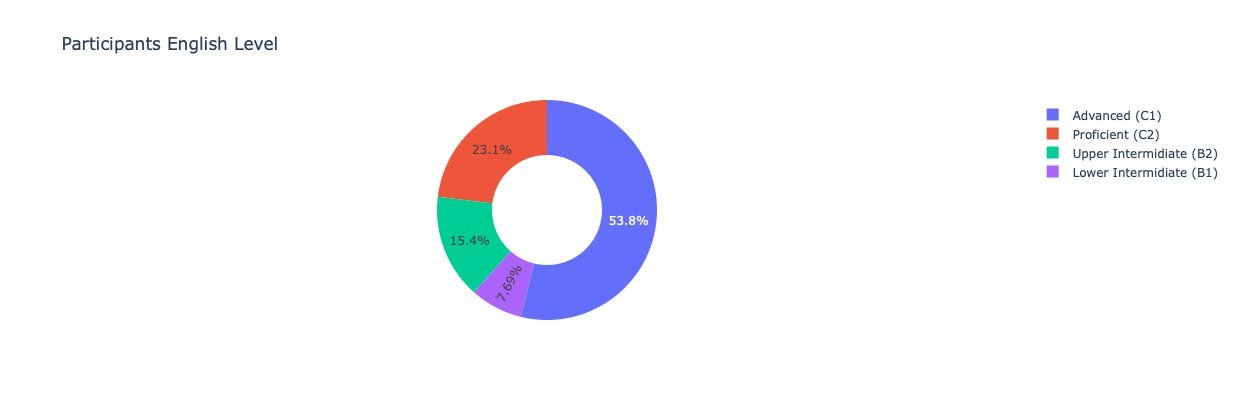

In [25]:
pie_4 = go.Figure(data=[go.Pie(
    name ='Participant English Level',
    labels = participant_English_Level,
    values = participant_english_level_values,
     hole=.5
)])

pie_4.update_layout(
    height=400, 
    width=1000,
    title_text="Participants English Level"
)